# Pokemon Classification

The task is to predict if the Pokemon is legendary or not

### Data processing
#### Loading the dataset

In [611]:
import pandas as pd

df = pd.read_csv("pokemon_modified.csv")

#### Removing features

I dropped features `name` and `classification`. the first one just does not show any information except name that is different for each Pokemon. The second feature has too many unique values (~500) and almost mirrors the `type1` feature which has ~30 unique values.

In [612]:
X = df.drop(columns=['is_legendary','name','classification'])

y = df['is_legendary']

#### Splitting data

In [613]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

#### Checking how well dataset is balanced

In [614]:
print("Percentage of legendary pokemons:",y[y == 1].count()/y.count() * 100)

Percentage of legendary pokemons: 8.739076154806492


Dataset is far from balanced. It contains only around 8.7% of one class and 81.3% of other

#### Exploring the dataset and checking for missing values

In [615]:
cols_with_nan = X.columns[X.isna().any()].to_list()
print("Columns with empty missing values:",cols_with_nan)

Columns with empty missing values: ['height_m', 'percentage_male', 'weight_kg']


#### Impute the missing values

In [616]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train[cols_with_nan] = imputer.fit_transform(np.array(X_train[cols_with_nan]))
X_test[cols_with_nan] = imputer.fit_transform(np.array(X_test[cols_with_nan]))


#### Double check that there are no missing values

In [617]:
cols_with_nan = X_train.columns[X_train.isna().any()].to_list()
print("Columns with empty missing values in train:",cols_with_nan)
cols_with_nan = X_test.columns[X_test.isna().any()].to_list()
print("Columns with empty missing values in test:",cols_with_nan)

Columns with empty missing values in train: []
Columns with empty missing values in test: []


#### Encode categorical features

In [618]:
X_train = pd.get_dummies(X_train,drop_first=True, columns=['type1'])
X_test = pd.get_dummies(X_test,drop_first=True,columns=['type1'])

#### Scaling the data

In [619]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


x_train = pd.DataFrame(scaler.fit_transform(X_train),columns=scaler.get_feature_names_out())
x_test = pd.DataFrame(scaler.fit_transform(X_test),columns=scaler.get_feature_names_out())

x_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.2,0.200000,0.5,0.250,0.200000,0.500,0.066667,0.066667,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,0.2,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.2,0.200000,0.5,0.000,0.200000,0.125,0.466667,0.466667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Confusion Matrix

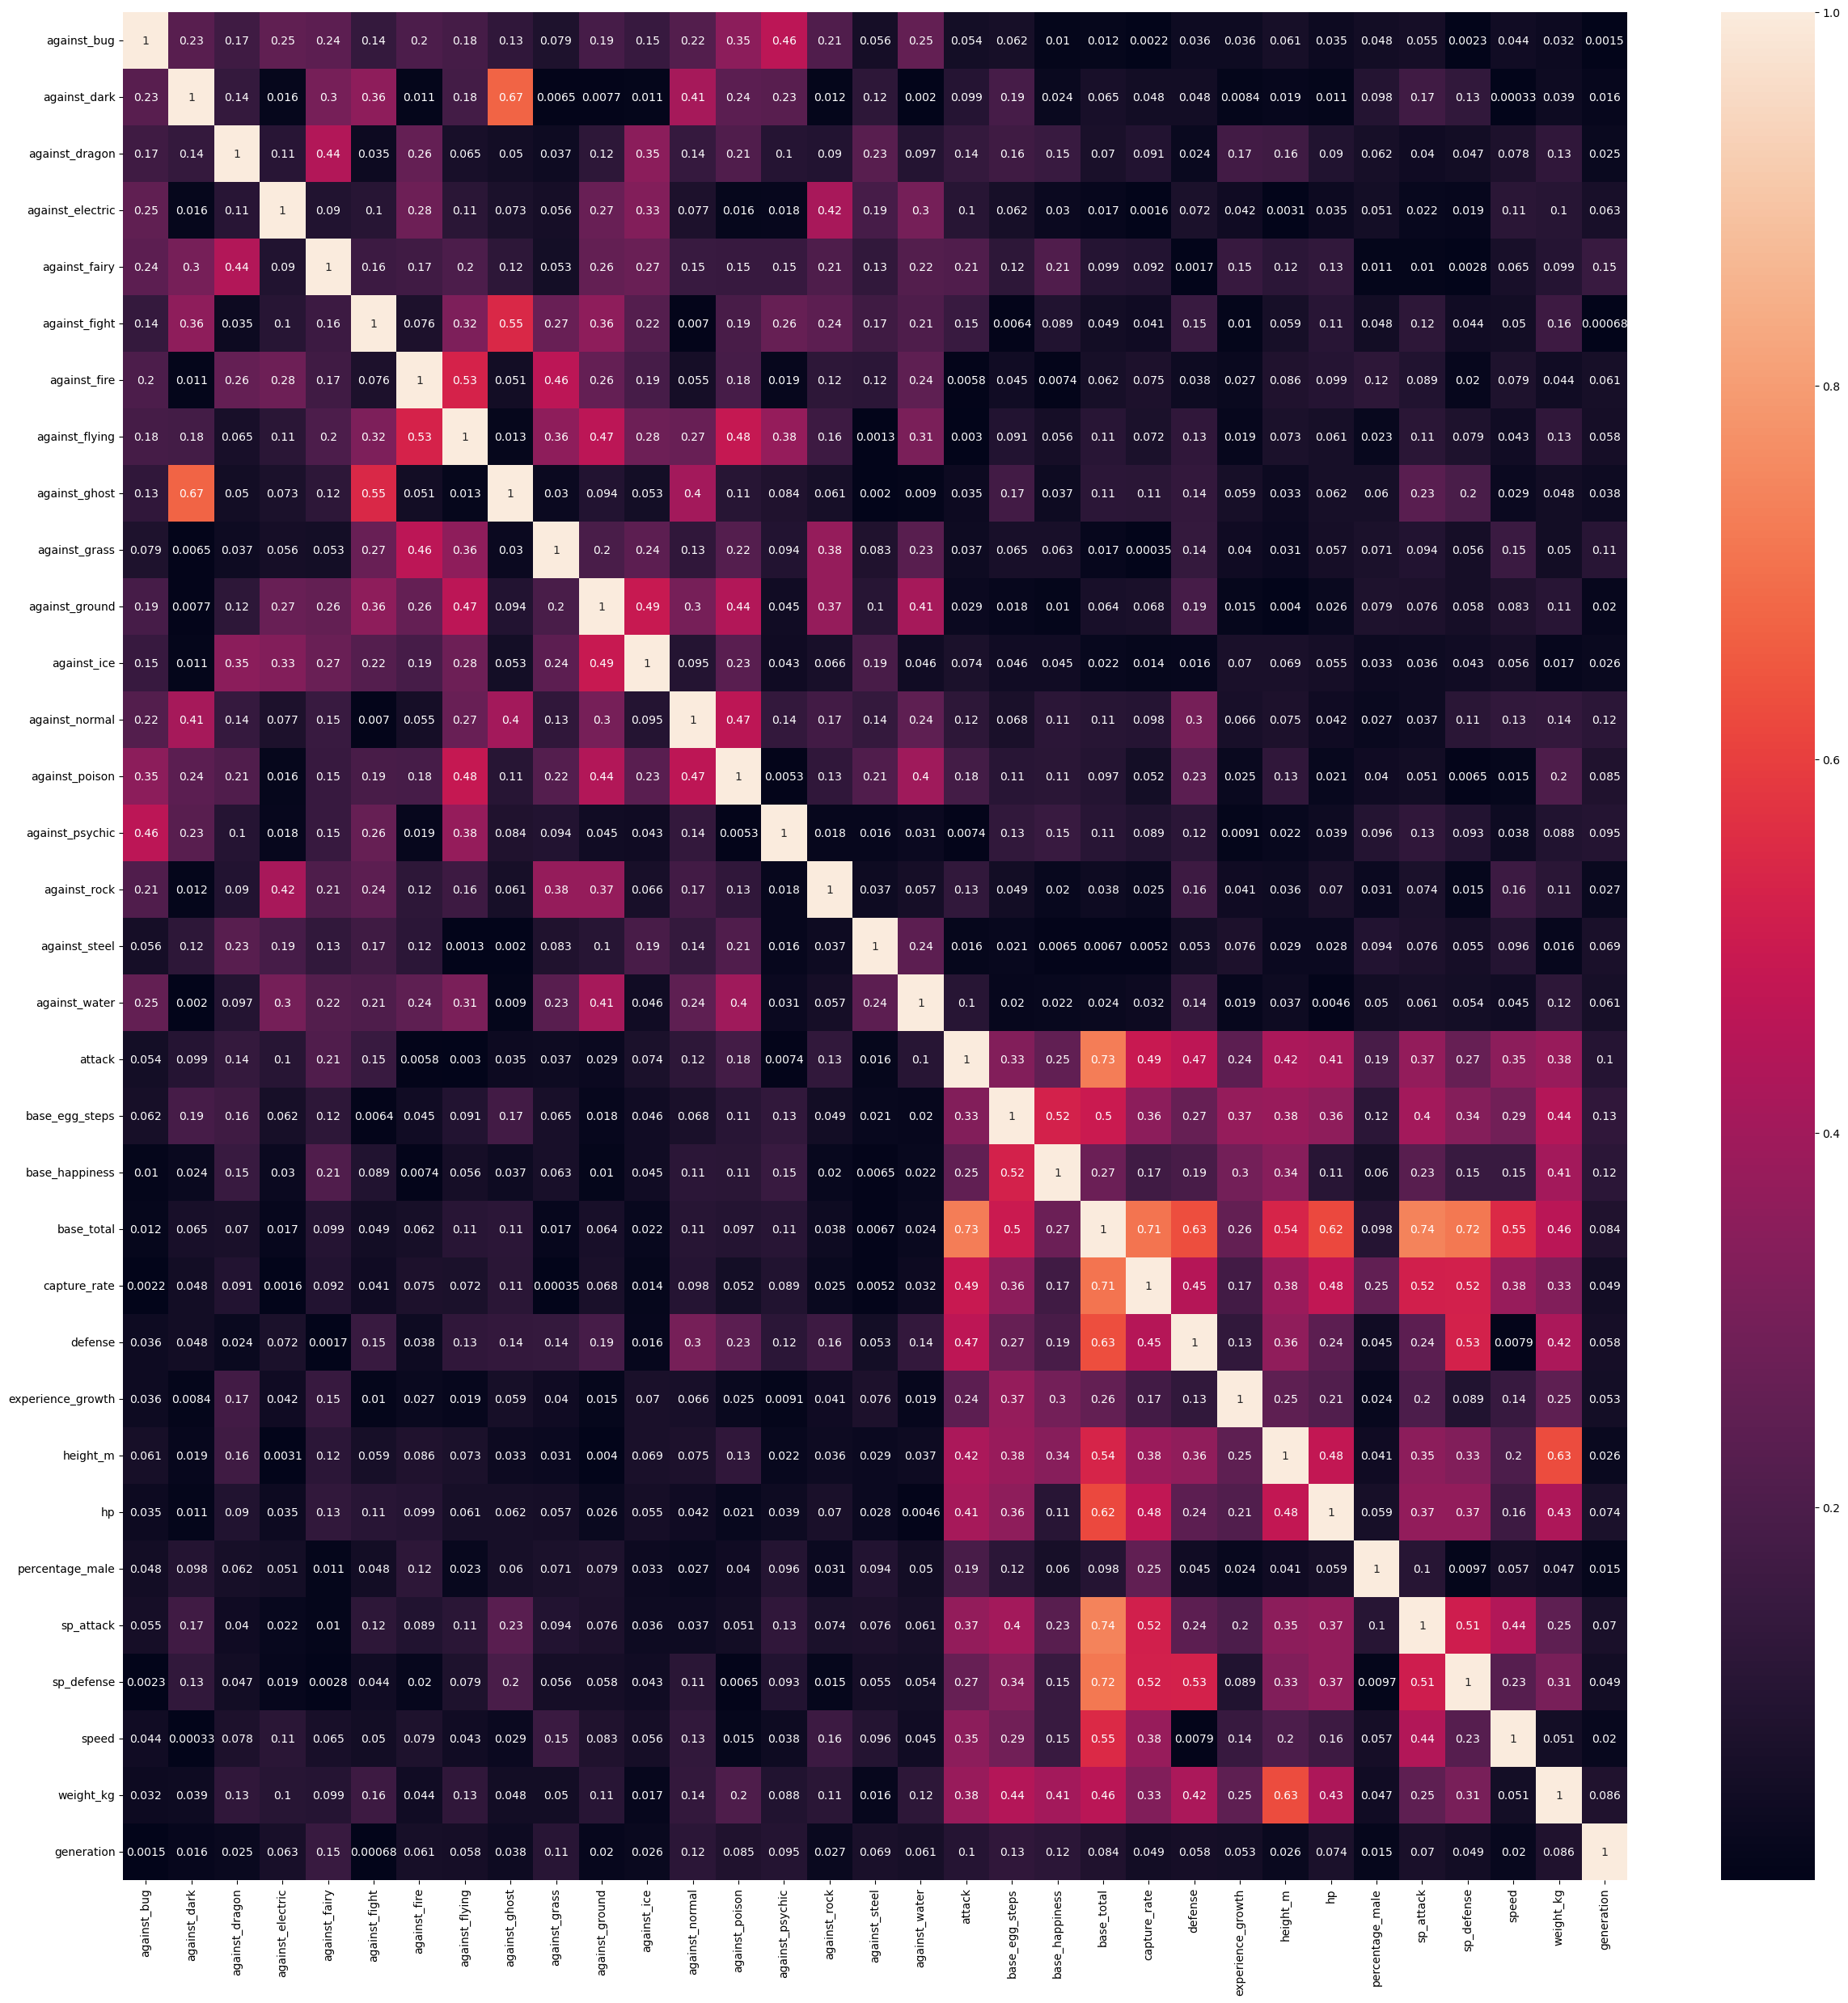

In [620]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))

sns.heatmap(abs(X.corr()),annot=True)

plt.show()


We can see that `base_total` is a lot (~60-70%) correlated with features in right-bottom light corner. It is a problem for Naive Bayes Classifier and Logistic Regression as the assumption for these methods is for features to be independent.

So, lets drop it. 

But first, lets watch our correlation matrix without this feature.

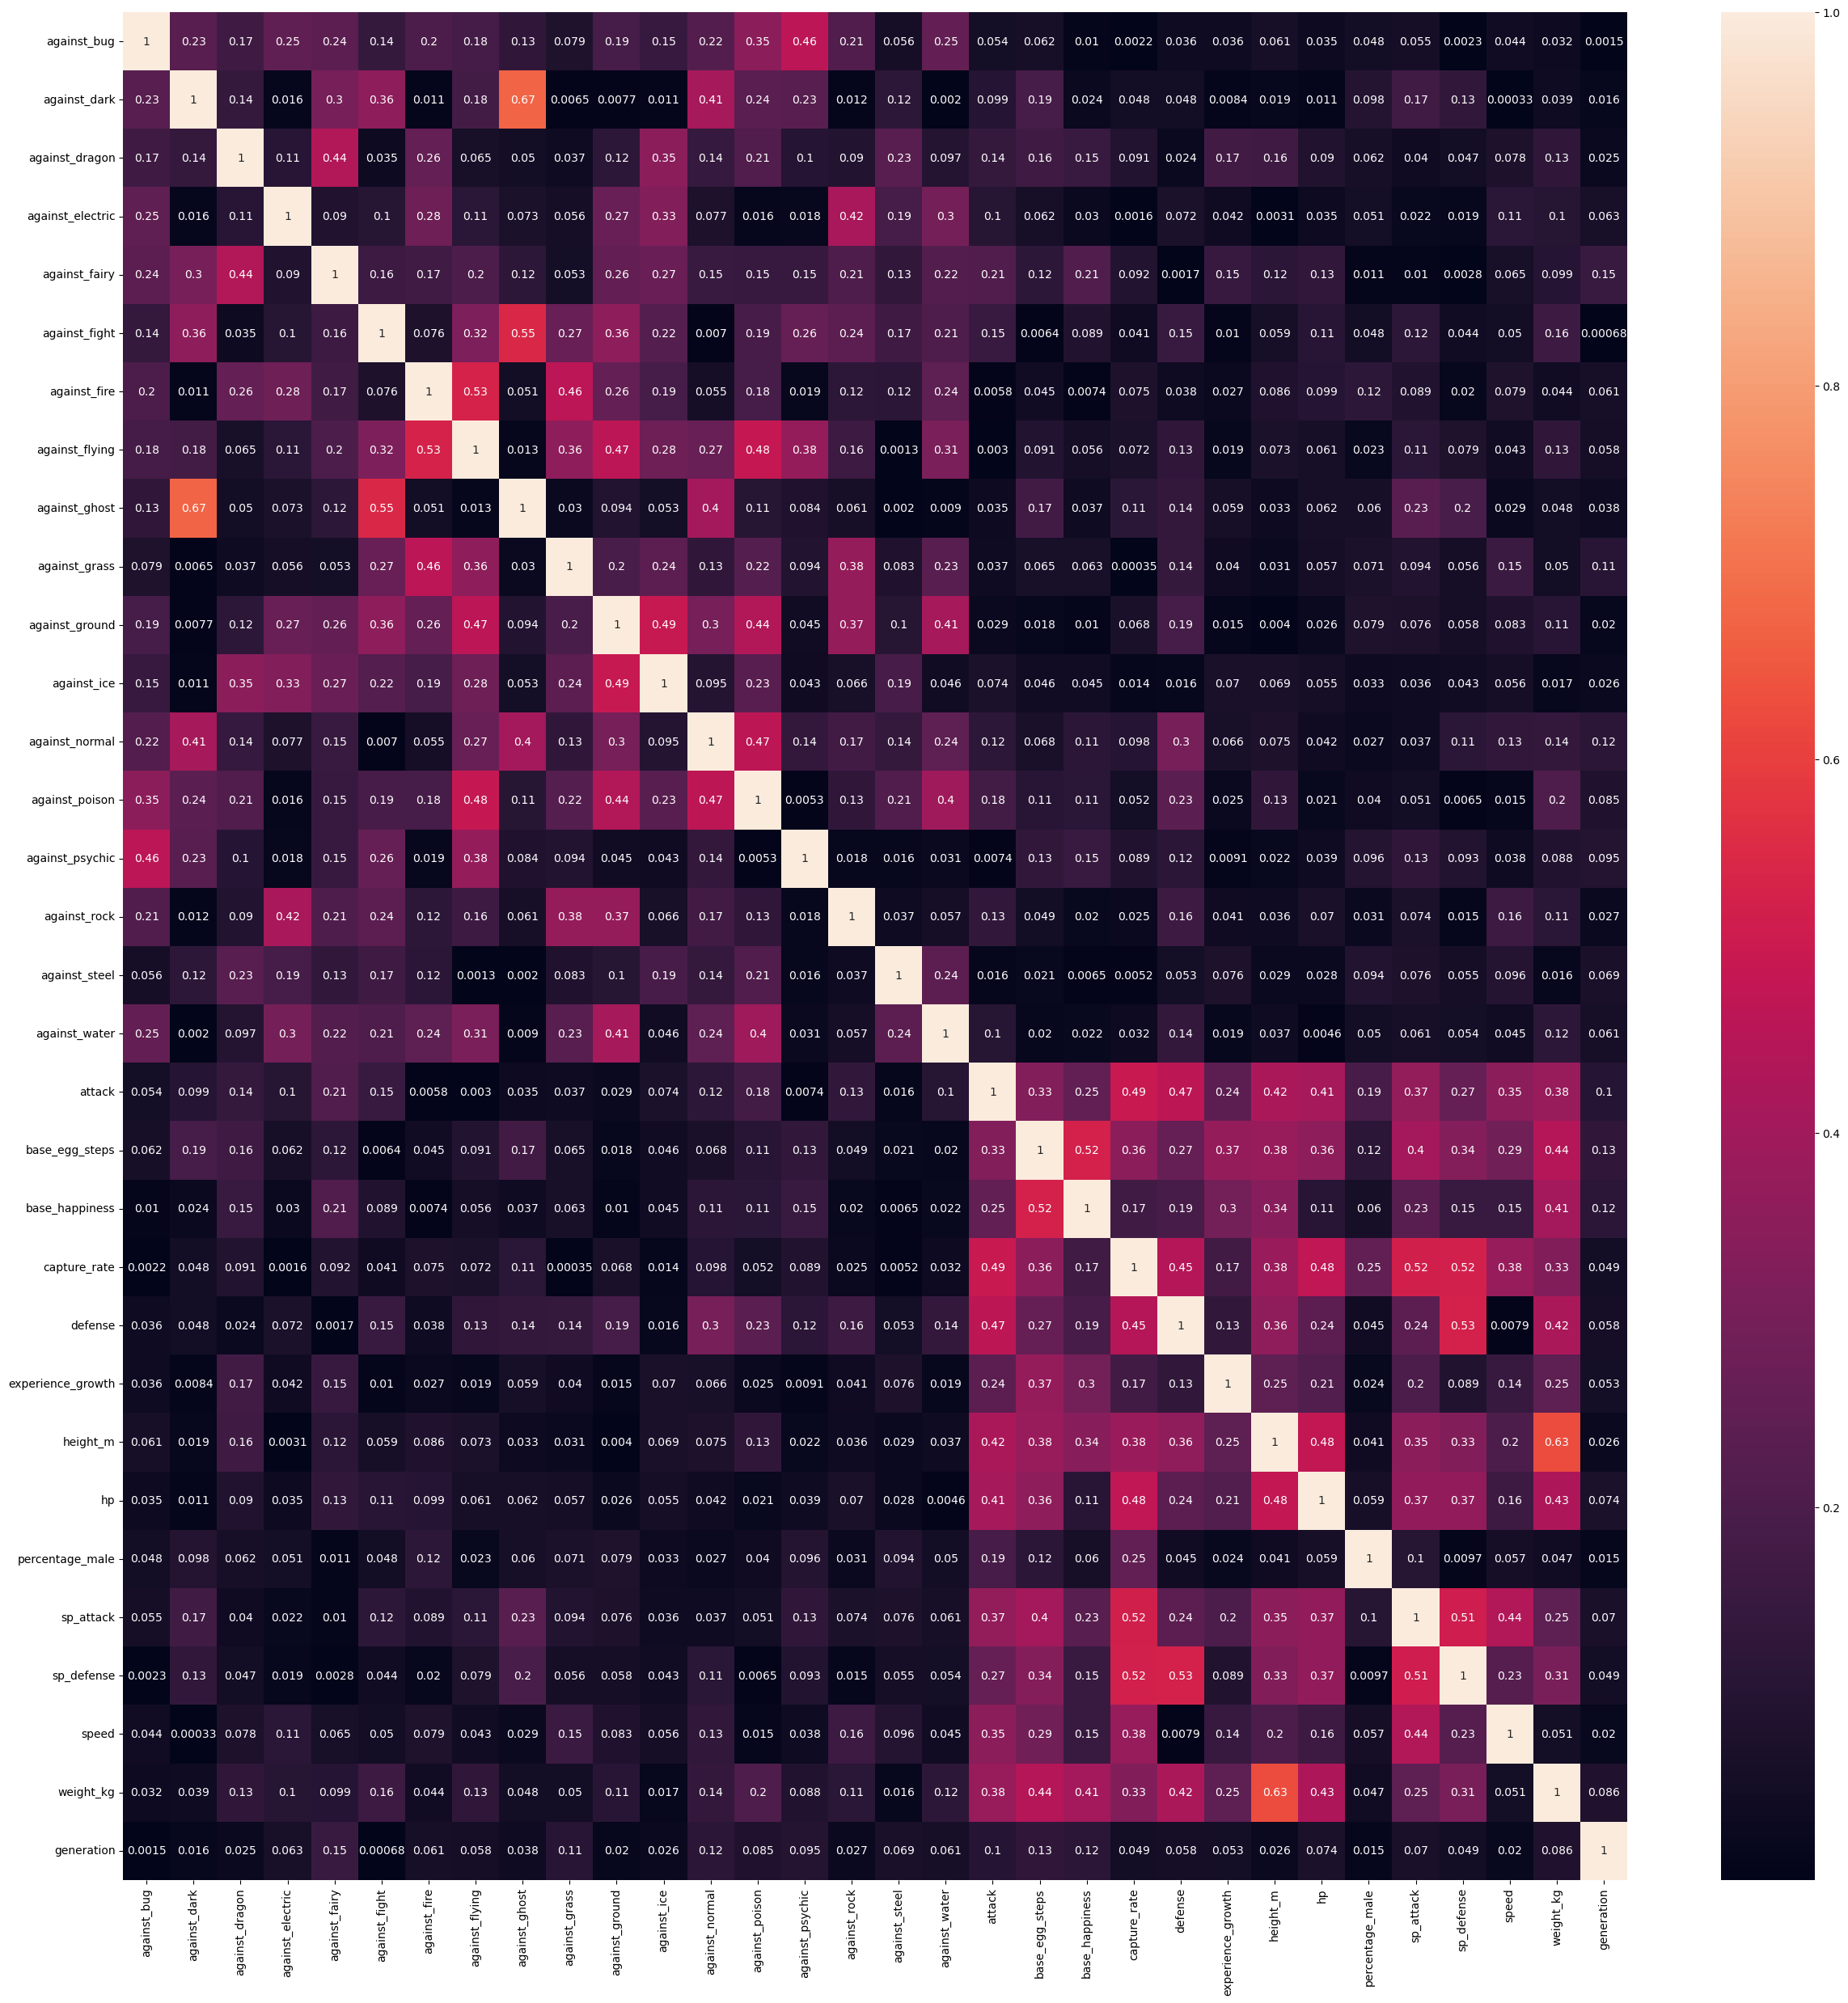

In [621]:
plt.figure(figsize=(30, 30))

sns.heatmap(abs(X.drop(columns=['base_total']).corr()),annot=True)

plt.show()

In [622]:
x_train.drop(columns=['base_total'],inplace=True)
x_test.drop(columns=['base_total'],inplace=True)

### Model fitting and Comparison

#### Tuning LR model

In [623]:
import numpy as np
import sklearn.metrics as metrics

def print_clf_metrics( y_actual, y_pred ):
    print("Accuracy:", metrics.accuracy_score(y_actual,y_pred))
    print("Precision:", metrics.precision_score(y_actual,y_pred))
    print("Recall:", metrics.recall_score(y_actual,y_pred))
    print("F1 Score:", metrics.f1_score(y_actual,y_pred))


In [624]:
parameters = {
    "penalty": ['l1','l2'],
    "C": np.logspace(-3,3,7),
    "solver": ["newton-cg","lbfgs", "liblinear"]
    }

In [625]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

gs_clf = GridSearchCV(LogisticRegression(),param_grid=parameters, cv=8,refit=True,scoring='accuracy')

In [626]:
gs_clf.fit(x_train,y_train)

c:\Users\seofu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\seofu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [627]:
print("Tuned Hyperparameters :",gs_clf.best_params_)
print("Accuracy :",gs_clf.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9890625


#### Final LR model

In [628]:
lr_clf = gs_clf.best_estimator_

In [629]:
y_pred = lr_clf.predict(x_test)

In [630]:
print_clf_metrics(y_test, y_pred)

Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104


#### Top 5 most influencing features and top 5 ignored features

In [631]:
features = pd.DataFrame(zip(lr_clf.feature_names_in_,lr_clf.coef_.ravel()),columns=["feature","coefficient"])

In [632]:
print("Most influencing:")
features.sort_values(by='coefficient',ascending=False,key=abs).head()

Most influencing:


,feature,coefficient
19,base_egg_steps,13.119949
21,capture_rate,-11.677245
42,type1_normal,-9.398411
29,speed,8.897600
23,experience_growth,8.710719


In [633]:
z = len(features[features['coefficient'] != 0].sort_values(by='coefficient',key=abs))

print(f"Most ignored except the {z} ones with zero coefficient")
features[features['coefficient'] != 0].sort_values(by='coefficient',key=abs).head()

Most ignored except the 23 ones with zero coefficient


,feature,coefficient
39,type1_grass,0.293556
28,sp_defense,0.314947
27,sp_attack,0.369480
38,type1_ghost,-0.531670
7,against_flying,0.618602


#### Tuning KNN model

In [634]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    "n_neighbors": range(1,15),
    "weights": ['uniform','distance'],
    'metric': ['euclidean','manhattan','chebyshev', 'cosine']
}

grid_search_clf = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=8,refit=True,scoring='accuracy')

grid_search_clf.fit(x_train,y_train)

print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

c:\Users\seofu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\seofu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.9515625000000001


#### Final KNN model


In [635]:
knn = grid_search_clf.best_estimator_
y_pred = knn.predict(x_test)
print_clf_metrics(y_test, y_pred)

Accuracy: 0.968944099378882
Precision: 1.0
Recall: 0.6428571428571429
F1 Score: 0.782608695652174


c:\Users\seofu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Naive Bayes Classifier

In [636]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(x_train,y_train)
y_pred = gauss_nb.predict(x_test)

print_clf_metrics(y_test, y_pred)

Accuracy: 0.8633540372670807
Precision: 0.3888888888888889
Recall: 1.0
F1 Score: 0.56


#### Choosing best metric?

The most appropriate metric for this task is recall because our mission to find legendary Pokemons because they are cool and rare. So, this metric indeed shows us how much of actual legendary Pokemons we treated as legendary ones.

#### Comparison of models in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? and based on what
did you pick it?

The best model for this task is the Logistic regression one. Firstly, it has recall of 1.0 (and we are indeed interested in this metric). Secondly, it remains other statistics good as well (93% - accuracy, 93% - precision, 96% - F1). Lastly, we prefer LR over Naive Bayes Classifier with the same recall metric of 1.0 as it has a bad precision (38%), thus bad F1 (56%) and lower accuracy (86%). Talking about KNN, it does not suit us as has the recall of 64% though it has a precision of 1.0 (but we are interested in recall) .